<a href="https://colab.research.google.com/github/gustavogrds/fenabrave_tcc/blob/main/An%C3%A1lise_de_dados_Prophet_dados_de_2012_at%C3%A9_agora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('SeriesTemporais_Autoveiculos.xlsm', header=4,parse_dates=True, squeeze=True)

In [ ]:
df

,Unnamed: 0,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,Exportação,Licenciamento Total.1,Licenciamento Nacionais.1,Licenciamento Importados.1,Produção.1,Exportação.1,Licenciamento Total.2,Licenciamento Nacionais.2,Licenciamento Importados.2,Produção.2,Exportação.2,Licenciamento Total.3,Licenciamento Nacionais.3,Licenciamento Importados.3,Produção.3,Exportação.3,Licenciamento Total.4,Licenciamento Nacionais.4,Licenciamento Importados.4,Produção.4,Exportação.4
0,1957-01-01,2009,2009,0,2317,0,758,758,0,1091,0,104,104,0,97,0,1037,1037,0,981,0,110,110,0,148,0
1,1957-02-01,2091,2091,0,2144,0,624,624,0,788,0,107,107,0,96,0,1262,1262,0,1103,0,98,98,0,157,0
2,1957-03-01,2802,2802,0,2660,0,817,817,0,1057,0,133,133,0,123,0,1706,1706,0,1290,0,146,146,0,190,0
3,1957-04-01,2530,2530,0,2449,0,722,722,0,890,0,105,105,0,118,0,1525,1525,0,1266,0,178,178,0,175,0
4,1957-05-01,2889,2889,0,2788,0,853,853,0,1012,0,147,147,0,141,0,1698,1698,0,1439,0,191,191,0,196,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2020-08-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
764,2020-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
765,2020-10-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
766,2020-11-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,Unnamed: 0,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,Exportação,Licenciamento Total.1,Licenciamento Nacionais.1,Licenciamento Importados.1,Produção.1,Exportação.1,Licenciamento Total.2,Licenciamento Nacionais.2,Licenciamento Importados.2,Produção.2,Exportação.2,Licenciamento Total.3,Licenciamento Nacionais.3,Licenciamento Importados.3,Produção.3,Exportação.3,Licenciamento Total.4,Licenciamento Nacionais.4,Licenciamento Importados.4,Produção.4,Exportação.4
0,1957-01-01,2009,2009,0,2317,0,758,758,0,1091,0,104,104,0,97,0,1037,1037,0,981,0,110,110,0,148,0
1,1957-02-01,2091,2091,0,2144,0,624,624,0,788,0,107,107,0,96,0,1262,1262,0,1103,0,98,98,0,157,0
2,1957-03-01,2802,2802,0,2660,0,817,817,0,1057,0,133,133,0,123,0,1706,1706,0,1290,0,146,146,0,190,0
3,1957-04-01,2530,2530,0,2449,0,722,722,0,890,0,105,105,0,118,0,1525,1525,0,1266,0,178,178,0,175,0
4,1957-05-01,2889,2889,0,2788,0,853,853,0,1012,0,147,147,0,141,0,1698,1698,0,1439,0,191,191,0,196,0


In [ ]:
df.tail(10)

,Unnamed: 0,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,Exportação,Licenciamento Total.1,Licenciamento Nacionais.1,Licenciamento Importados.1,Produção.1,Exportação.1,Licenciamento Total.2,Licenciamento Nacionais.2,Licenciamento Importados.2,Produção.2,Exportação.2,Licenciamento Total.3,Licenciamento Nacionais.3,Licenciamento Importados.3,Produção.3,Exportação.3,Licenciamento Total.4,Licenciamento Nacionais.4,Licenciamento Importados.4,Produção.4,Exportação.4
758,2020-03-01,163625,146460,17165,189958,30772,131276,122212,9064,156498,24852,25028,17085,7943,23062,4644,6438,6280,158,8406,969,883,883,0,1992,307
759,2020-04-01,55735,47368,8367,1847,7212,39501,35847,3654,946,5831,11962,7402,4560,102,1094,3952,3799,153,403,217,320,320,0,396,70
760,2020-05-01,62190,52396,9794,43080,3870,44137,39275,4862,29603,2016,12568,7862,4706,8204,952,4819,4593,226,4054,636,666,666,0,1219,266
761,2020-06-01,132818,115726,17092,98447,19457,102404,92067,10337,71262,13224,20391,14071,6320,20225,4622,8954,8519,435,5575,1230,1069,1069,0,1385,381
762,2020-07-01,174487,155692,18795,170287,29126,134956,124008,10948,135969,21215,28468,21051,7417,26261,6133,9540,9110,430,6820,1217,1523,1523,0,1237,561
763,2020-08-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
764,2020-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
765,2020-10-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
766,2020-11-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
767,2020-12-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = df.loc[660:762,['Unnamed: 0','Licenciamento Total']]

In [ ]:
df1


,Unnamed: 0,Licenciamento Total
660,2012-01-01,268273
661,2012-02-01,249517
662,2012-03-01,300574
663,2012-04-01,257887
664,2012-05-01,287465
...,...,...
758,2020-03-01,163625
759,2020-04-01,55735
760,2020-05-01,62190
761,2020-06-01,132818


In [ ]:
df1.info

<bound method DataFrame.info of     Unnamed: 0  Licenciamento Total
660 2012-01-01               268273
661 2012-02-01               249517
662 2012-03-01               300574
663 2012-04-01               257887
664 2012-05-01               287465
..         ...                  ...
758 2020-03-01               163625
759 2020-04-01                55735
760 2020-05-01                62190
761 2020-06-01               132818
762 2020-07-01               174487

[103 rows x 2 columns]>

In [ ]:
df1.describe()

,Licenciamento Total
count,103.000000
mean,235572.941748
std,65995.032768
min,55735.000000
25%,194206.500000
50%,227617.000000
75%,287786.500000
max,420080.000000


In [ ]:
df1.columns=['ds','y']

In [ ]:
df1.head(10)

,ds,y
660,2012-01-01,268273
661,2012-02-01,249517
662,2012-03-01,300574
663,2012-04-01,257887
664,2012-05-01,287465
665,2012-06-01,353200
666,2012-07-01,364196
667,2012-08-01,420080
668,2012-09-01,288108
669,2012-10-01,341644


In [ ]:
from fbprophet import Prophet


In [ ]:
split_point=len(df1)- 12
validation=df1[split_point:]
dataset=df1[0:split_point]

In [ ]:
dataset


,ds,y
660,2012-01-01,268273
661,2012-02-01,249517
662,2012-03-01,300574
663,2012-04-01,257887
664,2012-05-01,287465
...,...,...
746,2019-03-01,209165
747,2019-04-01,231936
748,2019-05-01,245440
749,2019-06-01,223198


In [ ]:

modelo= Prophet()

In [ ]:
modelo.fit(dataset)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro=modelo.make_future_dataframe(periods=12,freq='M')

In [ ]:
futuro

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
98,2020-02-29
99,2020-03-31
100,2020-04-30
101,2020-05-31


In [ ]:
saida = modelo.predict(futuro)

In [ ]:
saida.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
91,2019-07-31,223783.753379,135297.251454,193139.953658,223770.012753,223787.681613,-58786.476620,-58786.476620,-58786.476620,-58786.476620,-58786.476620,-58786.476620,0.0,0.0,0.0,164997.276758
92,2019-08-31,225180.784485,266313.052908,321464.882530,225019.564492,225346.221577,69542.503394,69542.503394,69542.503394,69542.503394,69542.503394,69542.503394,0.0,0.0,0.0,294723.287879
93,2019-09-30,226532.750072,245319.254889,299717.779311,226084.229940,227009.871444,46478.893229,46478.893229,46478.893229,46478.893229,46478.893229,46478.893229,0.0,0.0,0.0,273011.643301
94,2019-10-31,227929.781178,237109.719061,292349.987974,227100.713981,228706.397662,36482.245858,36482.245858,36482.245858,36482.245858,36482.245858,36482.245858,0.0,0.0,0.0,264412.027036
95,2019-11-30,229281.746765,267925.167043,322283.211985,228046.656122,230503.188518,66092.980668,66092.980668,66092.980668,66092.980668,66092.980668,66092.980668,0.0,0.0,0.0,295374.727433
96,2019-12-31,230678.777871,105692.405834,163636.147244,228971.509745,232465.135006,-94850.755785,-94850.755785,-94850.755785,-94850.755785,-94850.755785,-94850.755785,0.0,0.0,0.0,135828.022086
97,2020-01-31,232075.808978,129722.881532,188086.015743,229938.542259,234359.040898,-73869.563567,-73869.563567,-73869.563567,-73869.563567,-73869.563567,-73869.563567,0.0,0.0,0.0,158206.245410
98,2020-02-29,233382.709045,194002.052587,249082.553244,230660.114769,236346.424728,-11603.737048,-11603.737048,-11603.737048,-11603.737048,-11603.737048,-11603.737048,0.0,0.0,0.0,221778.971997
99,2020-03-31,234779.740151,227800.583067,287861.178476,231468.125719,238254.519663,23945.770866,23945.770866,23945.770866,23945.770866,23945.770866,23945.770866,0.0,0.0,0.0,258725.511017
100,2020-04-30,236131.705738,224022.309994,280524.644992,232190.175425,240128.575897,16350.724431,16350.724431,16350.724431,16350.724431,16350.724431,16350.724431,0.0,0.0,0.0,252482.430169


In [ ]:
saida.info

<bound method DataFrame.info of             ds          trend  ...  multiplicative_terms_upper           yhat
0   2012-01-01  336396.759526  ...                         0.0  298652.323200
1   2012-02-01  334358.613465  ...                         0.0  278325.016260
2   2012-03-01  332451.960698  ...                         0.0  320258.701499
3   2012-04-01  330413.814637  ...                         0.0  304467.858826
4   2012-05-01  328441.415218  ...                         0.0  317725.784817
..         ...            ...  ...                         ...            ...
98  2020-02-29  233382.709045  ...                         0.0  221778.971997
99  2020-03-31  234779.740151  ...                         0.0  258725.511017
100 2020-04-30  236131.705738  ...                         0.0  252482.430169
101 2020-05-31  237528.736844  ...                         0.0  221540.182338
102 2020-06-30  238880.702431  ...                         0.0  251393.218545

[103 rows x 16 columns]>

In [ ]:
modelo.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [ ]:
saida[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
91,2019-07-31,164997.276758,135297.251454,193139.953658
92,2019-08-31,294723.287879,266313.052908,321464.882530
93,2019-09-30,273011.643301,245319.254889,299717.779311
94,2019-10-31,264412.027036,237109.719061,292349.987974
95,2019-11-30,295374.727433,267925.167043,322283.211985
96,2019-12-31,135828.022086,105692.405834,163636.147244
97,2020-01-31,158206.245410,129722.881532,188086.015743
98,2020-02-29,221778.971997,194002.052587,249082.553244
99,2020-03-31,258725.511017,227800.583067,287861.178476
100,2020-04-30,252482.430169,224022.309994,280524.644992


In [ ]:
#validação
validation


,ds,y
751,2019-08-01,242985
752,2019-09-01,234848
753,2019-10-01,253361
754,2019-11-01,242310
755,2019-12-01,262558
756,2020-01-01,193459
757,2020-02-01,200997
758,2020-03-01,163625
759,2020-04-01,55735
760,2020-05-01,62190


In [ ]:
validation_df= validation.loc[:,['ds']]

In [ ]:
validation_df

,ds
751,2019-08-01
752,2019-09-01
753,2019-10-01
754,2019-11-01
755,2019-12-01
756,2020-01-01
757,2020-02-01
758,2020-03-01
759,2020-04-01
760,2020-05-01


In [ ]:
saida2=modelo.predict(validation_df)

In [ ]:
saida2[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
0,2019-08-01,225970.636635,198064.504089,256749.045944
1,2019-09-01,245289.193699,218987.629006,273612.689047
2,2019-10-01,254054.671299,224794.625349,282340.024719
3,2019-11-01,246586.009313,220246.125910,274689.319681
4,2019-12-01,282950.342736,253344.056701,309590.384219
5,2020-01-01,192979.407065,161929.378777,222138.206439
6,2020-02-01,176087.277292,147798.874619,202156.778560
7,2020-03-01,221234.515365,191590.230864,249428.347776
8,2020-04-01,208878.849860,180730.936553,237073.740164
9,2020-05-01,225461.140856,195420.687102,253300.607840


In [ ]:
#erro
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(df1.y, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 38836.182


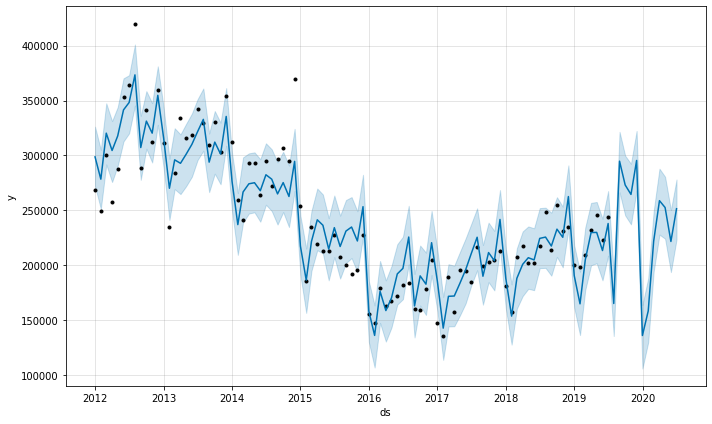

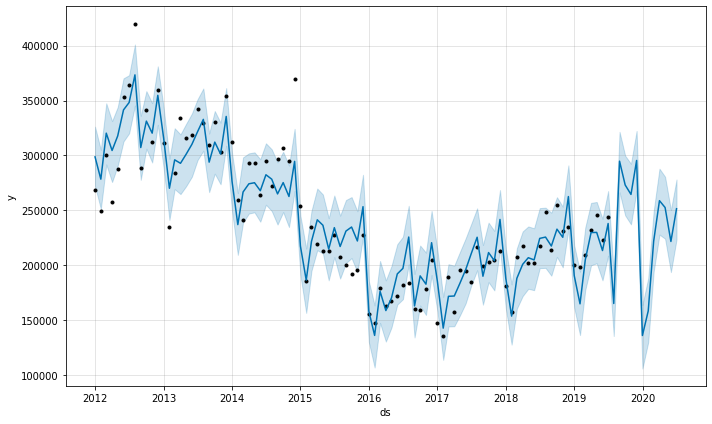

In [ ]:
modelo.plot(saida)

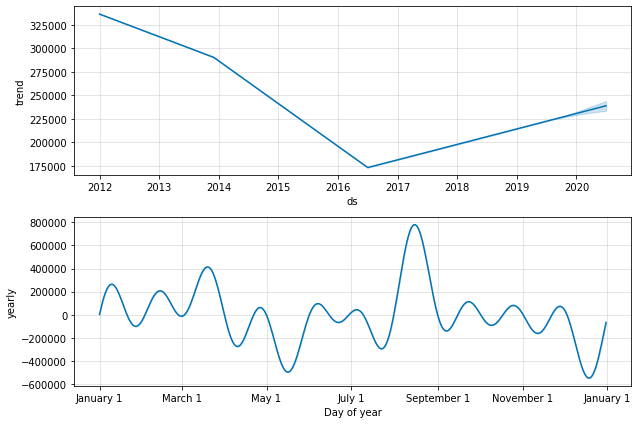

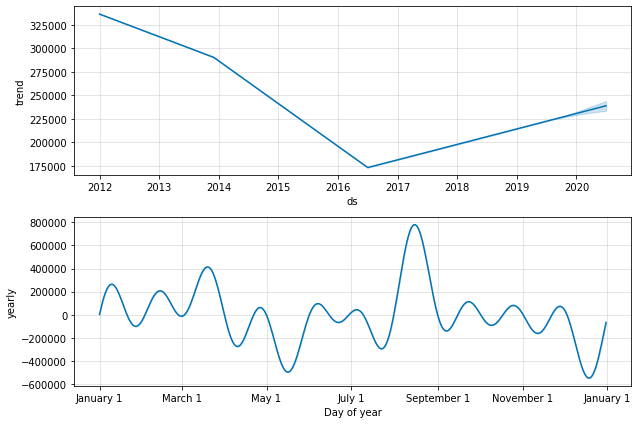

In [ ]:
modelo.plot_components(saida)

In [ ]:
saida[['yhat']].describe()

,yhat
count,103.000000
mean,241140.003365
std,55477.970124
min,135828.022086
25%,198834.014689
50%,232748.794306
75%,280334.458914
max,373390.429011


In [ ]:
help(Prophet())

Help on Prophet in module fbprophet.forecaster object:

class Prophet(builtins.object)
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly from
 |      the first `changepoint_range` proportion of the history.
 |  changepoint_range: Proportion of history in which trend changepoints will
 |      be estimated. Defaults to 0.8 for the first 80%. Not used if
 |      `changepoints` is specified.
 |  yearly_seasonality: Fit yearly seasonality.
 |      Can be 'auto', True, False, or a number of Fourier terms to generate.
 |  